In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [66]:
glob("*")

['DO_NOT_STORE_PERSISTENT_FILES_HERE.md',
 'sample_submission.csv',
 'test.csv',
 'id_container',
 'train.csv',
 'mini5.ipynb']

In [67]:
train = pd.read_csv("train.csv")
display(train.shape)
train.head()

(7500, 11)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [68]:
test = pd.read_csv("test.csv")
display(test.shape)
test.head()

(7500, 10)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


In [69]:
submission = pd.read_csv("sample_submission.csv")
submission

,ID,Calories_Burned
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
7495,TEST_7495,0
7496,TEST_7496,0
7497,TEST_7497,0
7498,TEST_7498,0


array([[<AxesSubplot:title={'center':'Exercise_Duration'}>,
        <AxesSubplot:title={'center':'Body_Temperature(F)'}>,
        <AxesSubplot:title={'center':'BPM'}>],
       [<AxesSubplot:title={'center':'Height(Feet)'}>,
        <AxesSubplot:title={'center':'Height(Remainder_Inches)'}>,
        <AxesSubplot:title={'center':'Weight(lb)'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Calories_Burned'}>, <AxesSubplot:>]],
      dtype=object)

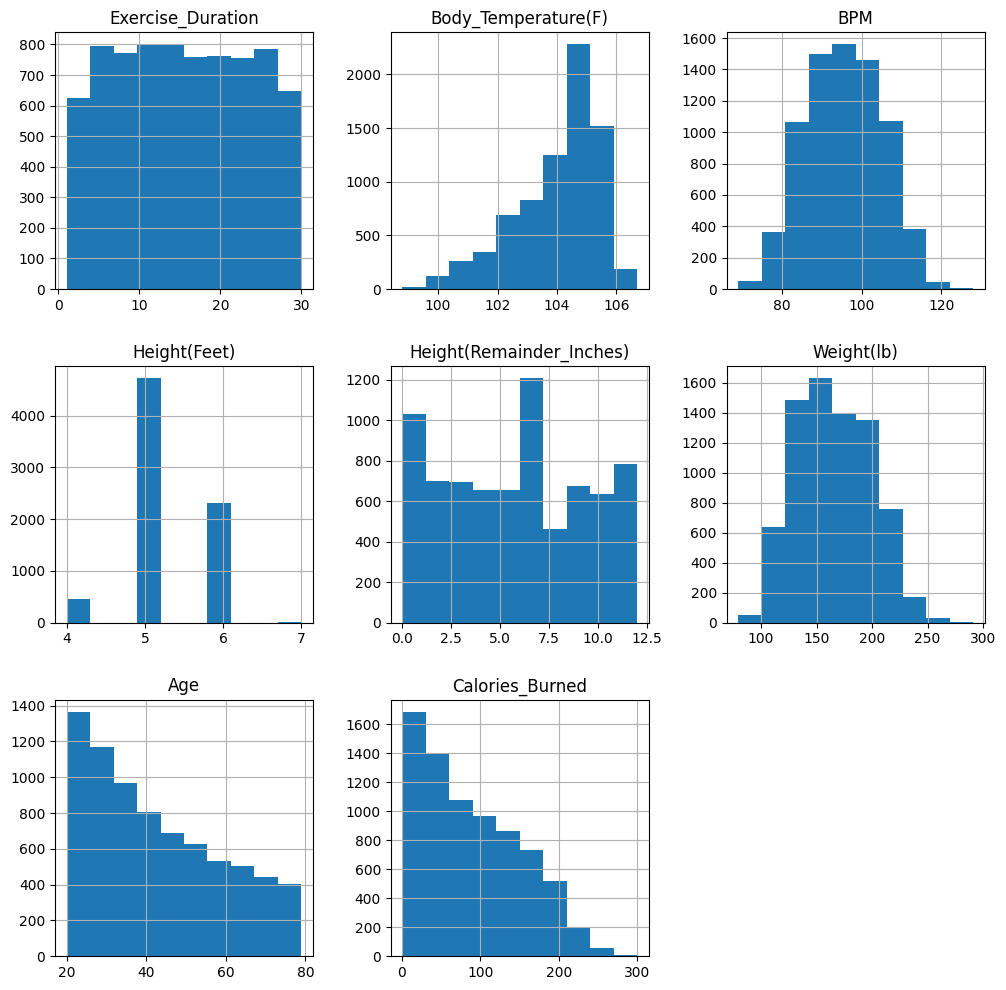

In [70]:
train.hist(figsize = (12,12))

In [71]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [73]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

<AxesSubplot:>

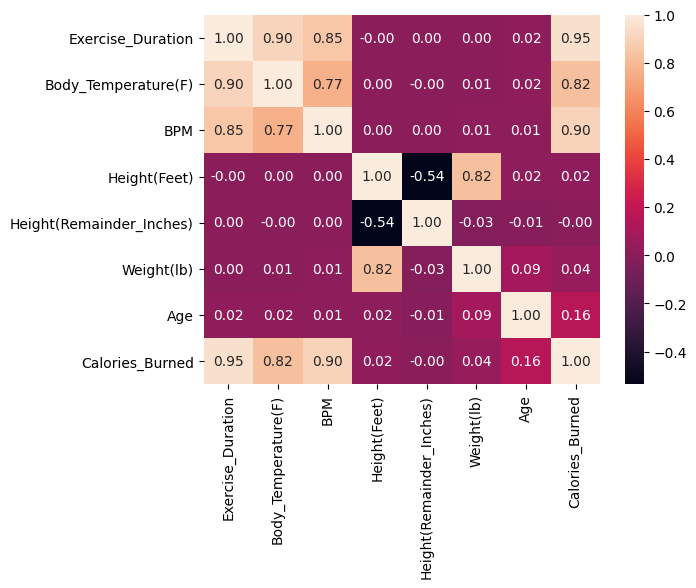

In [74]:
sns.heatmap(train.corr(), 
           annot = True,
           fmt = ".2f")

In [75]:
# ID 컬럼 제거
train = train.drop(columns = "ID")
test = test.drop(columns = "ID")

In [76]:
# # 로그변환
# train.columns
# col = ['Body_Temperature(F)', 'Age']

# for i in col:
#     train[i] = np.log1p(train[i])

# train.hist(figsize=(6,6))

In [77]:
# train.columns
# col = ['Body_Temperature(F)', 'Age']


# for i in col:
#     test[i] = np.log1p(test[i])

# test.hist(figsize=(6,6))

# 키 컬럼 합쳐주기& cm로 변경

In [78]:
train.columns

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age', 'Calories_Burned'],
      dtype='object')

In [79]:
train["Height(cm)"] = ((train["Height(Feet)"] * 30.3) 
                       + (train["Height(Remainder_Inches)"] * 2.54))

# train = train.drop(columns = ['Height(Feet)',
#        'Height(Remainder_Inches)'])

In [80]:
test["Height(cm)"] = ((test["Height(Feet)"] * 30.3) 
                       + (test["Height(Remainder_Inches)"] * 2.54))

# test = test.drop(columns = ['Height(Feet)',
#        'Height(Remainder_Inches)'])

<AxesSubplot:>

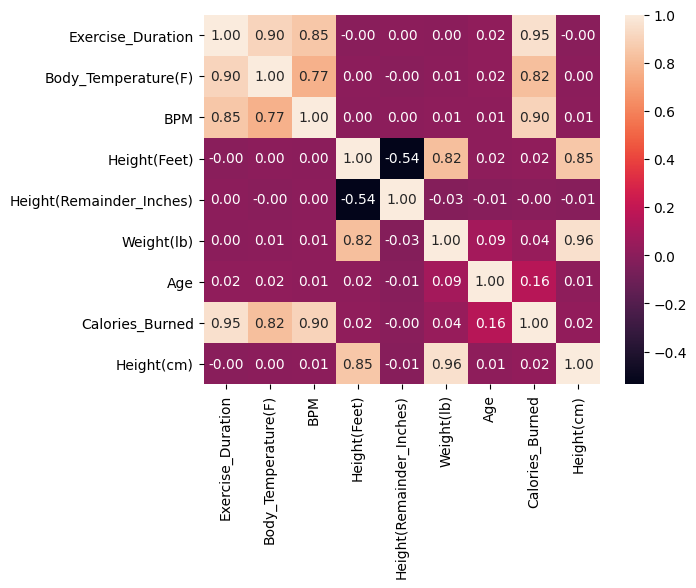

In [81]:
sns.heatmap(train.corr(), annot = True, fmt = ".2f")

# Object => 수치형 변환

In [82]:
categorical_feature = train.select_dtypes(exclude="number").columns
categorical_feature

Index(['Weight_Status', 'Gender'], dtype='object')

In [83]:
train[categorical_feature] = train[categorical_feature].astype("category")
test[categorical_feature] = test[categorical_feature].astype("category")

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Exercise_Duration         7500 non-null   float64 
 1   Body_Temperature(F)       7500 non-null   float64 
 2   BPM                       7500 non-null   float64 
 3   Height(Feet)              7500 non-null   float64 
 4   Height(Remainder_Inches)  7500 non-null   float64 
 5   Weight(lb)                7500 non-null   float64 
 6   Weight_Status             7500 non-null   category
 7   Gender                    7500 non-null   category
 8   Age                       7500 non-null   int64   
 9   Calories_Burned           7500 non-null   float64 
 10  Height(cm)                7500 non-null   float64 
dtypes: category(2), float64(8), int64(1)
memory usage: 542.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 col

(None, None)

# 범주형 데이터 OrdinalEncoder 로 인코딩 하기

In [84]:
# train, valid 나눈 상태에서 인코딩을 하게 되면 valid 에만 있는 범주값이 제외되게 됩니다.
# OrdinalEncoder
# handle_unknown='use_encoded_value', unknown_value=-1
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train[categorical_feature] = oe.fit_transform(train[categorical_feature])
test[categorical_feature] = oe.transform(test[categorical_feature])

In [85]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   float64
 7   Gender                    7500 non-null   float64
 8   Age                       7500 non-null   int64  
 9   Calories_Burned           7500 non-null   float64
 10  Height(cm)                7500 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 644.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       

(None, None)

# X, y 만들기

In [86]:
X = train.drop(columns="Calories_Burned")
y = train["Calories_Burned"]

X.shape, y.shape

((7500, 10), (7500,))

# 데이터셋 나누기

In [87]:
# train_test_split을 이용해 X, y 값을 X_train, X_valid, y_train, y_valid 으로 나눠줍니다.
# Hold-out-valiation을 위해 train, valid 세트로 나누기
# test_size=0.1 => 이름은 test지만 train으로 나눠주었기 때문에 valid 사이즈를 지정한 것입니다.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6750, 10), (750, 10), (6750,), (750,))

In [88]:
X_test = test
X_test.shape

(7500, 10)

# 딥러닝 모델 만들기

In [89]:
# tensorflow import 
import tensorflow as tf

In [90]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(64, activation='relu', input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 모델 컴파일

In [91]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = "mse",
              optimizer = optimizer,
              metrics = ["mse", "mae"])

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


# 학습

In [93]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈추개 합니다.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [94]:

history = model.fit(X_train, y_train,
                    epochs = 1000, verbose = 0,
                    validation_data = (X_valid, y_valid),
                    validation_split= 0.1,
                    callbacks = [early_stop, PrintDot()])
history


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................

In [95]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae
438,7.565092,7.565092,1.942259,2.145720,2.145720,1.038149
439,7.477067,7.477067,1.989664,1.556032,1.556032,0.930232
440,7.603079,7.603079,2.016413,9.699445,9.699445,2.633473
441,7.433053,7.433053,1.927354,1.935039,1.935039,0.952276
442,7.855311,7.855311,2.021647,4.785238,4.785238,1.713735


<AxesSubplot:>

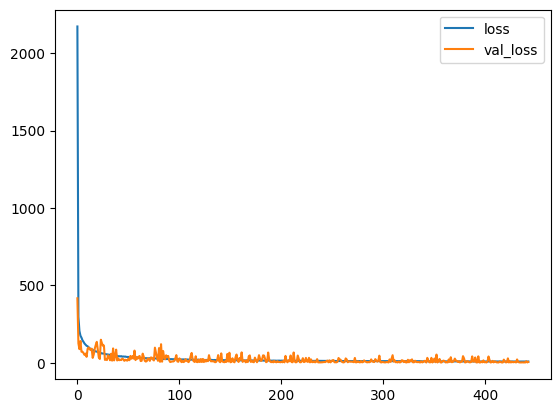

In [96]:
# loss plot
df_hist[["loss", "val_loss"]].plot()

<AxesSubplot:>

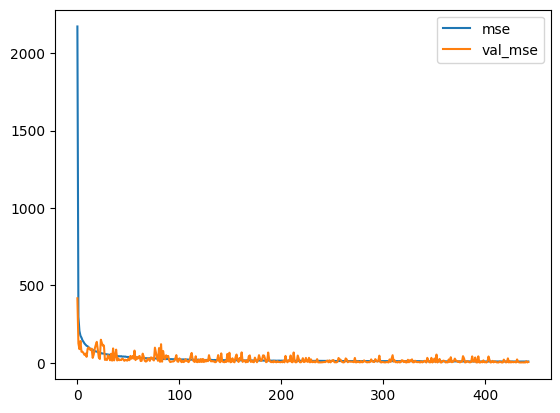

In [97]:
# mse plot
df_hist[["mse", "val_mse"]].plot()

# 평가

In [98]:
# loss, mae, mse = model.evaluate
model.evaluate(X_valid,y_valid)

24/24 [==============================] - 0s 1ms/step - loss: 4.7852 - mse: 4.7852 - mae: 1.7137


[4.785238265991211, 4.785238265991211, 1.7137352228164673]

In [99]:
# predict
# y_valid_pred

y_valid_pred = model.predict(X_valid).flatten()
y_valid_pred[:5]

24/24 [==============================] - 0s 1ms/step


array([ 19.204098, 134.23302 , 121.213   ,  12.913324,  19.923025],
      dtype=float32)

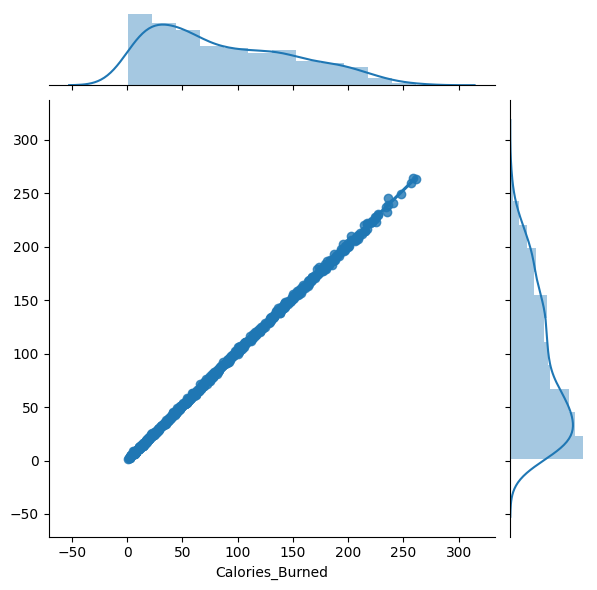

In [100]:
# jointplot
sns.jointplot(x= y_valid, y=y_valid_pred, kind = "reg")

# R Square Score

In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_valid, y_valid_pred)
r2

0.9988004340391335

# 딥러닝 모델의 예측결과 평가하기

In [102]:
error = y_valid - y_valid_pred

In [103]:
mse =(error**2).mean()
mse

## rmse
rmse = mse**0.5
rmse

2.1875188598500177

In [104]:
loss, mae, mse = model.evaluate(X_valid,y_valid)
loss, mae, mse 

24/24 [==============================] - 0s 1ms/step - loss: 4.7852 - mse: 4.7852 - mae: 1.7137


(4.785238265991211, 4.785238265991211, 1.7137352228164673)

# 제출용 예측

In [105]:
# predict
y_predict = model.predict(X_test).flatten()
y_predict[:5]

235/235 [==============================] - 0s 1ms/step


array([175.52068 , 193.87335 ,  55.204052, 164.45377 , 225.05103 ],
      dtype=float32)

# 제출

In [106]:
submission["Calories_Burned"] = y_predict

In [107]:
file_name = f"submit_tf_{r2:.5f}.csv"
file_name

'submit_tf_0.99880.csv'

In [108]:
submission.to_csv(file_name,index = False )
pd.read_csv(file_name).head(2)

,ID,Calories_Burned
0,TEST_0000,175.52068
1,TEST_0001,193.87335
